<a href="https://colab.research.google.com/github/muhammadfajrulfaiz/Project--Training/blob/main/PYTN_Assgn_2_%3Cbatch_4%3E_Muhammad_Fajrul_Faiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###IMPORT LIBRARY

In [1]:
import pandas as pd
import math
import statistics
import scipy.stats as st
import scipy.stats
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Hacktiv8/nyc-rolling-sales.csv")

###EXPLORATORY DATA ANALYTICS

In [3]:
#look data quickly
df.head(10)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00


In [4]:
#checking nulls value
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
df['BUILDING CLASS AT PRESENT'].unique()

array(['C2', 'C7', 'C4', 'D5', 'D9', 'D7', 'D1', 'C6', 'D0', 'D4', 'RR',
       ' ', 'R2', 'R4', 'S3', 'S4', 'S5', 'R1', 'R8', 'R9', 'K4', 'M9',
       'M3', 'RK', 'RS', 'A9', 'A4', 'B3', 'B1', 'S2', 'C0', 'R6', 'C5',
       'C3', 'C1', 'D6', 'S9', 'O2', 'O1', 'O3', 'O5', 'O6', 'K1', 'K2',
       'L9', 'L8', 'L1', 'H1', 'H8', 'H3', 'R5', 'G6', 'P7', 'M1', 'N2',
       'RB', 'RG', 'RT', 'K9', 'V1', 'GW', 'G2', 'I7', 'M4', 'Z9', 'B9',
       'D3', 'G9', 'I9', 'U6', 'O4', 'L3', 'H2', 'E1', 'Z3', 'RW', 'C9',
       'J5', 'N9', 'S1', 'A5', 'J8', 'B2', 'C8', 'F5', 'Q1', 'G7', 'G5',
       'G4', 'P2', 'Q9', 'Y1', 'RA', 'RP', 'O8', 'HR', 'G1', 'E7', 'I5',
       'R3', 'I4', 'H9', 'RH', 'D8', 'HB', 'J4', 'W2', 'P9', 'A7', 'D2',
       'S0', 'O7', 'O9', 'W3', 'HS', 'H6', 'J9', 'R0', 'HH', 'W8', 'W6',
       'A1', 'K5', 'F1', 'V9', 'A2', 'V0', 'G0', 'F4', 'E9', 'I3', 'W4',
       'V3', 'I1', 'A6', 'Q8', 'A3', 'Z0', 'W1', 'U1', 'F2', 'F9', 'GU',
       'I6', 'G8', 'P5', 'Y3', 'W9', 'M2', 'G3', 'V6

In [7]:
df['BUILDING CLASS CATEGORY'].unique()

array(['07 RENTALS - WALKUP APARTMENTS             ',
       '08 RENTALS - ELEVATOR APARTMENTS           ',
       '09 COOPS - WALKUP APARTMENTS               ',
       '10 COOPS - ELEVATOR APARTMENTS             ',
       '11A CONDO-RENTALS                           ',
       '12 CONDOS - WALKUP APARTMENTS              ',
       '13 CONDOS - ELEVATOR APARTMENTS            ',
       '14 RENTALS - 4-10 UNIT                     ',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL          ',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ',
       '17 CONDO COOPS                             ',
       '22 STORE BUILDINGS                         ',
       '37 RELIGIOUS FACILITIES                    ',
       '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC  ',
       '46 CONDO STORE BUILDINGS                   ',
       '47 CONDO NON-BUSINESS STORAGE              ',
       '01 ONE FAMILY DWELLINGS                    ',
       '02 TWO FAMILY DWELLINGS                    ',
       '03 THREE FAMILY DWE

In [8]:
#Data Clean up 
#Menghapus kolom yang tidak diperlukan 
df_new = df.drop(['Unnamed: 0','LOT','EASE-MENT','ADDRESS','APARTMENT NUMBER','ADDRESS','ZIP CODE'], axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   BUILDING CLASS AT PRESENT       84548 non-null  object
 6   RESIDENTIAL UNITS               84548 non-null  int64 
 7   COMMERCIAL UNITS                84548 non-null  int64 
 8   TOTAL UNITS                     84548 non-null  int64 
 9   LAND SQUARE FEET                84548 non-null  object
 10  GROSS SQUARE FEET               84548 non-null  object
 11  YEAR BUILT                      84548 non-null  int64 
 12  TAX CLASS AT TIME OF SALE       84548 non-null

In [9]:
#clean duplicated rows in datases
df_new = df_new.drop_duplicates()
sum(df_new.duplicated())

0

In [10]:
#there are many missing values in some coloumn in datasets we need to replace some value of missing 
df_new.replace(' -  ', 0,  inplace=True)
df_new.replace(np.nan,0, inplace=True)
df_new.info()

<ipython-input-10-f56a00572758>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.replace(' -  ', 0,  inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81797 entries, 0 to 84547
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         81797 non-null  int64 
 1   NEIGHBORHOOD                    81797 non-null  object
 2   BUILDING CLASS CATEGORY         81797 non-null  object
 3   TAX CLASS AT PRESENT            81797 non-null  object
 4   BLOCK                           81797 non-null  int64 
 5   BUILDING CLASS AT PRESENT       81797 non-null  object
 6   RESIDENTIAL UNITS               81797 non-null  int64 
 7   COMMERCIAL UNITS                81797 non-null  int64 
 8   TOTAL UNITS                     81797 non-null  int64 
 9   LAND SQUARE FEET                81797 non-null  object
 10  GROSS SQUARE FEET               81797 non-null  object
 11  YEAR BUILT                      81797 non-null  int64 
 12  TAX CLASS AT TIME OF SALE       81797 non-null

In [11]:
#Add new coloumn 
df_new['BOROUGH_Category'] = df_new['BOROUGH'].astype(str)
df_new['BOROUGH_Category'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
df_new 

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_Category
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00,Staten Island
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00,Staten Island
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00,Staten Island
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00,Staten Island


In [12]:
#changing datatype
df_new['TAX CLASS AT TIME OF SALE'] = df_new['TAX CLASS AT TIME OF SALE'].astype('category')
df_new['TAX CLASS AT PRESENT'] = df_new['TAX CLASS AT PRESENT'].astype('category')
df_new['LAND SQUARE FEET'] = pd.to_numeric(df_new['LAND SQUARE FEET'], errors='coerce')
df_new['GROSS SQUARE FEET']= pd.to_numeric(df_new['GROSS SQUARE FEET'], errors='coerce')
df_new['SALE DATE'] = pd.to_datetime(df_new['SALE DATE'], errors='coerce')
df_new['SALE PRICE'] = pd.to_numeric(df_new['SALE PRICE'], errors='coerce')
df_new['BOROUGH_Category'] = df_new['BOROUGH_Category'].astype('category')

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81797 entries, 0 to 84547
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         81797 non-null  int64         
 1   NEIGHBORHOOD                    81797 non-null  object        
 2   BUILDING CLASS CATEGORY         81797 non-null  object        
 3   TAX CLASS AT PRESENT            81797 non-null  category      
 4   BLOCK                           81797 non-null  int64         
 5   BUILDING CLASS AT PRESENT       81797 non-null  object        
 6   RESIDENTIAL UNITS               81797 non-null  int64         
 7   COMMERCIAL UNITS                81797 non-null  int64         
 8   TOTAL UNITS                     81797 non-null  int64         
 9   LAND SQUARE FEET                81797 non-null  int64         
 10  GROSS SQUARE FEET               81797 non-null  int64         
 11  YE

In [14]:
df_new

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BOROUGH_Category
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,C2,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19,Manhattan
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,28,3,31,4616,18690,1900,2,C7,0,2016-12-14,Manhattan
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,C7,16,1,17,2212,7803,1900,2,C7,0,2016-12-09,Manhattan
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,C4,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23,Manhattan
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,C2,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28,Staten Island
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,B9,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21,Staten Island
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,B2,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05,Staten Island
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,K6,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21,Staten Island


##MEDIAN

In [15]:
#find median in each tax class category and present to pivot table
pivot_TAX_CLASS = df_new.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)
pivot_TAX_CLASS

,SALE PRICE
TAX CLASS AT PRESENT,
,911333.0
1,410000.0
1A,330000.0
1B,0.0
1C,845073.5
2,540000.0
2A,25000.0
2B,97500.0
2C,755834.0


In [16]:
#find median in each BUILDING CLASS category and present to pivot table
pivot_BUILDING_CLASS_CATEGORY	= df_new.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.median)
pivot_BUILDING_CLASS_CATEGORY

,SALE PRICE
BUILDING CLASS CATEGORY,
01 ONE FAMILY DWELLINGS,410000.0
02 TWO FAMILY DWELLINGS,430000.0
03 THREE FAMILY DWELLINGS,287000.0
04 TAX CLASS 1 CONDOS,345000.0
05 TAX CLASS 1 VACANT LAND,0.0
06 TAX CLASS 1 - OTHER,0.0
07 RENTALS - WALKUP APARTMENTS,250000.0
08 RENTALS - ELEVATOR APARTMENTS,4600000.0
09 COOPS - WALKUP APARTMENTS,269000.0


In [17]:
pivot_BOROUGH_Category = df_new.pivot_table(index='BOROUGH_Category', values='SALE PRICE', aggfunc=np.median)
pivot_BOROUGH_Category

,SALE PRICE
BOROUGH_Category,
Bronx,280000
Brooklyn,445000
Manhattan,890000
Queens,320000
Staten Island,366000


##MEAN

In [18]:
pivot_BOROUGH_Category = df_new.pivot_table(index='BOROUGH_Category', values='TOTAL UNITS', aggfunc=np.mean)
pivot_BOROUGH_Category

,TOTAL UNITS
BOROUGH_Category,
Bronx,3.528958
Brooklyn,2.204410
Manhattan,2.538288
Queens,1.904094
Staten Island,1.322019


##MODUS

In [19]:
pivot_BOROUGH_Category = df_new.pivot_table(index='BOROUGH_Category', values='SALE PRICE', aggfunc=pd.Series.mode)
pivot_BOROUGH_Category

,SALE PRICE
BOROUGH_Category,
Bronx,0
Brooklyn,0
Manhattan,0
Queens,0
Staten Island,0


In [20]:
mode_ = statistics.mode(df_new['TAX CLASS AT PRESENT'])
mode_

'1'

In [21]:
mode_ = statistics.mode(df_new['BUILDING CLASS CATEGORY'])
mode_

'01 ONE FAMILY DWELLINGS                    '

##Range

In [22]:
#
df_new['TOTAL UNITS'].unique()

array([   5,   31,   17,   10,    6,   20,    8,   46,   15,   24,   34,
          0,   47,  132,    1,    4,    2,    3,    7,    9,   16,  211,
         32,   13,   19,   35,   18,   14,   30,   12,   21,   23,   45,
         26,   11,   48,   82,   55,   42,   38,   27,  422,  538,  482,
        323,   52,  318,   67,   25,   22,   28,  107,  137,   36,   37,
         96,  138,   76,   33,  286,  256,  771,  257,   44,  315,   41,
         51,   40,   29,   81,   54,   72,   56,   68,   74,   39,   50,
         61,  902,   70,  551,  254,  185,   78,  181,   49,   91,   87,
        269,  102,  234,  235,  233,   59,   62,   73,   43,  121, 1653,
        192,  100,  113,   99,   92,   75,  374,   77,  238,  317,   93,
         69,   60,   64,  111,  395,  155,  193,  103,  146,  287,   94,
         84,   65,   95,   63,   71,   57,  736,  680,  179,   53,  291,
         66,  114,   79,   83,  520,  163,  127,  222,  130,   90,   58,
        159,  462,  142,  955,  129,  889,  109,  1

In [23]:
year_built = df_new[(df_new['YEAR BUILT'] > 0)]
range_ = np.ptp(year_built['YEAR BUILT'])
range_

906

In [24]:
np.min(year_built['YEAR BUILT'])

1111

In [25]:
np.max(year_built['YEAR BUILT'])

2017

##Varience

In [26]:
var_ = statistics.variance(year_built['YEAR BUILT'])
var_

1162.0982601690143

In [27]:
var_ = statistics.variance(df_new['SALE PRICE'])
var_

111390782800612.16

In [28]:
var_ = statistics.variance(df_new['TOTAL UNITS'])
var_

343.56301091894716

##Standar Deviasi

In [29]:
std_ = statistics.stdev(year_built['YEAR BUILT'])
std_

34.089562334665054

In [30]:
std_ = statistics.stdev(df_new['SALE PRICE'])
std_

10554183.189646281

In [31]:
std_ = statistics.stdev(df_new['TOTAL UNITS'])
std_

18.53545281127351

##Probability Distribution

<ipython-input-32-0ae77a22f281>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_new['BOROUGH'],


[Text(0.5, 0, 'normal'), Text(0, 0.5, 'freq')]

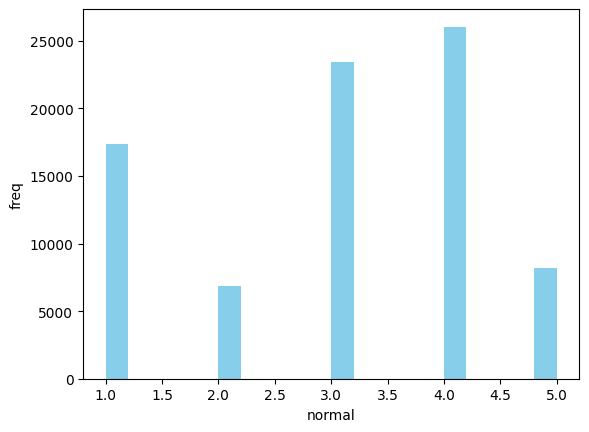

In [32]:
ax = sns.distplot(df_new['BOROUGH'], 
                  bins=20,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='normal', ylabel = 'freq')

<ipython-input-33-bb050b27c9c8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_new['SALE DATE'],


[Text(0.5, 0, 'normal'), Text(0, 0.5, 'freq')]

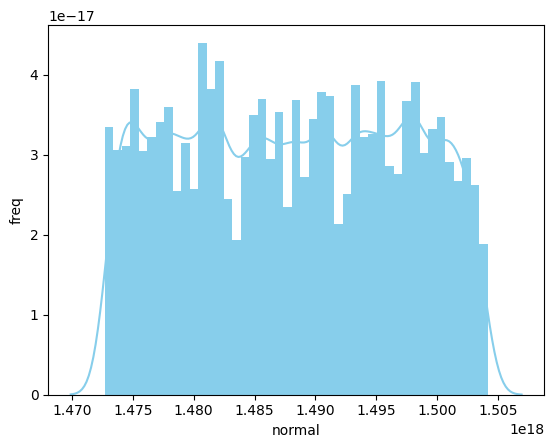

In [33]:
ax = sns.distplot(df_new['SALE DATE'], 
                  #bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='normal', ylabel = 'freq')

<ipython-input-34-a447f74d77c6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_binom,


[Text(0.5, 0, 'normal'), Text(0, 0.5, 'freq')]

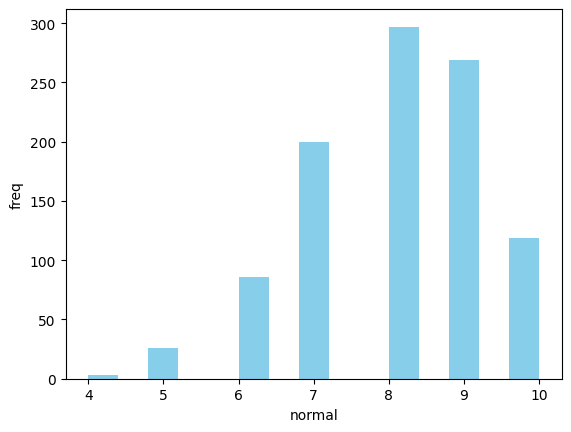

In [34]:
from scipy.stats import binom 
data_binom = binom.rvs(n=10, p=0.8,size=1000)
ax = sns.distplot(data_binom, 
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='normal', ylabel = 'freq')

##CONFIDENTIAL INTERVAL

In [35]:
dataframe = pd.DataFrame(df_new,
                         columns=['SALE PRICE' ,'BOROUGH_Category'])


In [36]:
df_filtered = dataframe.loc[dataframe['BOROUGH_Category'] == 'Manhattan']
df_filtered.drop(
                  df_filtered.index[(df_filtered["SALE PRICE"] < 1)],
                  axis=0,
                  inplace= True
                  )
df_filtered

<ipython-input-36-3b103fa5ca5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(


,SALE PRICE,BOROUGH_Category
0,6625000,Manhattan
3,3936272,Manhattan
4,8000000,Manhattan
6,3192840,Manhattan
9,16232000,Manhattan
...,...,...
18296,560000,Manhattan
18297,475000,Manhattan
18298,400530,Manhattan
18300,2000000,Manhattan


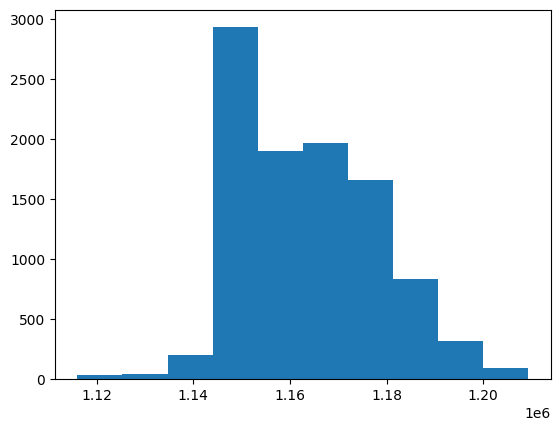


90.0 confidence interval 1150000.0 and 1190000.0


In [37]:
#COMPUTING CI WITH Bootstrapping

# configure bootstrap
n_iterations = 10000
n_size = int(len(df_filtered['SALE PRICE']))

#run bootstrap
medians = list()
for i in range(n_iterations):
   s = resample(df_filtered['SALE PRICE'], n_samples=n_size);
   m = np.median(s);
   medians.append(m)

# plot scores
plt.hist(medians)
plt.show()

# confidence intervals
alpha = 0.90
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(medians, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(medians, p)

print(f"\n{alpha*100} confidence interval {lower} and {upper}")

## Hypothesis Testing

In [38]:
Queens = df_new[df_new['BOROUGH'] == 4]
Staten_Island = df_new[df_new['BOROUGH'] == 5]

n_queens = len(Queens)
mean_queens = Queens['TOTAL UNITS'].mean()
std_queens = Queens['TOTAL UNITS'].std()

(n_queens, mean_queens,std_queens)

(26036, 1.9040943309264096, 23.23425641495587)

In [39]:
n_Staten_Island = len(Queens)
mean_Staten_Island = Staten_Island['TOTAL UNITS'].mean()
std_Staten_Island = Staten_Island['TOTAL UNITS'].std()

(n_Staten_Island,mean_Staten_Island,std_Staten_Island)

(26036, 1.3220193603725034, 3.0503883777344303)

In [40]:
sm.stats.ztest(Queens['TOTAL UNITS'].dropna(),
               Staten_Island['TOTAL UNITS'].dropna(),alternative='two-sided')

(2.2570829555156497, 0.02400289171106401)